# AED : Analyse Univariée

Dans ce notebook, nous allons voir des commandes simples pour les statistiques descriptives utiles à l'analyse univariée.

L'objectif de ce laboratoire est de mener une recherche préliminaire sur la question de savoir si les vagues de chaleur renforcent les politiques environnementales.

Pour ce faire, vous pouvez importer dans ce notebook le jeu de données `02b_sample_data.xlsx` en le déposant dans le dossier "Fichiers" du panneau latéral gauche de cette fenêtre Google Colab.

Variables:
- **cname**: Nom du pays
- **ccodealp**: Nom de code du pays (abréviation)
- **year**: Année
- **oecd_eps**: Indice de rigueur de la politique environnementale (EPS: Environmental Policy Stringency Index)
- **cckp_temp**: Température annuelle moyenne en Celsius (tirée du Climate Change Knowledge Portal (cckp))
- **cckp_rain**: Moyenne annuelle des précipitations en mm (tirée du Climate Change Knowledge Portal (cckp))



## Manipulations de base avec Pandas

In [ ]:
# Importer les packages.
import pandas as pd
# J'importe également les fonctions de skew qui permettent de mesurer l'asymétrie (skewness).
from scipy.stats import skew
# Plotly pour les cartes.
import plotly.express as px
# Matplotlib pour les graphiques en ligne.
import matplotlib.pyplot as plt
# Pour certaines fonctions utiles avec les nombres, p. ex. 'arrange()'.
import numpy as np

Importez des données et faites-vous une première idée de ce à quoi elles ressemblent :

In [ ]:
# Importer les données dans un dataframe appelé df.
df = pd.read_excel('/content/sample_data/02b_sample_data.xlsx')

# Afficher les 5 premières lignes de df.
df.head()

,cname,ccodealp,year,oecd_eps,cckp_temp,cckp_rain
0,Australia,AUS,1995,0.500000,21.566667,43.316667
1,Australia,AUS,1996,0.458333,21.891667,39.441667
2,Australia,AUS,1997,0.458333,21.633333,43.266667
3,Australia,AUS,1998,0.770833,22.208333,45.058333
4,Australia,AUS,1999,1.020833,21.700000,47.258333


Maintenant, faites-vous une première idée de la distribution de ces variables.

In [ ]:
# Statistiques résumées pour chaque colonne.
df.describe()

,year,oecd_eps,cckp_temp,cckp_rain
count,594.0000,594.000000,594.000000,594.000000
mean,2003.5000,1.674025,10.764310,77.027048
std,5.1925,0.951695,7.495521,42.363971
min,1995.0000,0.333333,-7.433333,28.183333
25%,1999.0000,0.770833,7.450000,49.993750
50%,2003.5000,1.562500,10.170833,63.150000
75%,2008.0000,2.426042,13.814583,92.487500
max,2012.0000,4.133333,26.375000,281.100000


Où sont les noms de pays et les abréviations ?

⟹ describe() est une fonction qui s'applique automatiquement seulement aux variables numériques. Par conséquent, si vous souhaitez également des informations pour d'autres variables, vous devez spécifier l'option `include="all"` entre parenthèses.

In [ ]:
# Statistiques résumées pour chaque colonne.
df.describe(include="all")

,cname,ccodealp,year,oecd_eps,cckp_temp,cckp_rain
count,594,594,594.0000,594.000000,594.000000,594.000000
unique,33,33,NaN,NaN,NaN,NaN
top,Australia,AUS,NaN,NaN,NaN,NaN
freq,18,18,NaN,NaN,NaN,NaN
mean,NaN,NaN,2003.5000,1.674025,10.764310,77.027048
std,NaN,NaN,5.1925,0.951695,7.495521,42.363971
min,NaN,NaN,1995.0000,0.333333,-7.433333,28.183333
25%,NaN,NaN,1999.0000,0.770833,7.450000,49.993750
50%,NaN,NaN,2003.5000,1.562500,10.170833,63.150000
75%,NaN,NaN,2008.0000,2.426042,13.814583,92.487500


Question: Quelles nouvelles informations cela donne-t-il ?



---

Analyse de la variable explicative uniquement:

In [ ]:
# Statistiques descriptives simples pour une colonne.
df['cckp_temp'].describe()

,cckp_temp
count,594.000000
mean,10.764310
std,7.495521
min,-7.433333
25%,7.450000
50%,10.170833
75%,13.814583
max,26.375000


In [ ]:
# Obtenir la moyenne d'une colonne.
df['cckp_temp'].mean()

10.764309764309765

In [ ]:
# Obtenir l'asymétrie d'une colonne (rappelez-vous que nous avons importé cette fonction spécifique).
df['cckp_temp'].skew()

0.08352560953383154

À vous de jouer maintenant. Consultez `Panda_Cheat_Sheet.pdf` et explorez les fonctions présentées dans la section en haut à droite : Récupérer des informations sur les Series/DataFrames.

##Analyse univariée

Dans cette section, vous utiliserez les statistiques descriptives pour :

1. **Préparer les données :** En étudiant la distribution des variables, vous déterminerez si vous devez transformer les données (par exemple, appliquer une transformation logarithmique, définir une variable catégorielle, gérer des valeurs aberrantes, etc.).

2. **Choisir les bons outils statistiques :**
 À l’issue de cette étape, vous connaîtrez la nature de chaque variable (continue, catégorielle, binaire, etc.), ce qui vous permettra de sélectionner les outils statistiques appropriés (corrélation, graphiques en barres/lignes, nuages de points, etc.).

3. **Comprendre la variation sous-jacente :** Il est également essentiel d’observer comment une variable évolue dans le temps (graphiques en ligne) et dans l’espace (cartes). Cela vous aidera à mieux appréhender les données et à repérer d’éventuelles anomalies ou des chocs intéressants à exploiter pour une expérience naturelle.



### 3.1 Variable de résultat : Indice de rigueur des politiques environnementales
L'indice de rigueur est une variable continue dont les valeurs vont de 0,3 à 4,1 dans l'échantillon sélectionné. La moyenne est de 1,6, avec une médiane légèrement plus basse (1,5).

Observations :

1. **Histogramme et tableau :** Les données sont légèrement asymétrique vers la droite (coefficient d'asymétrie de 0,39) avec une densité de valeurs très faibles. Le coefficient d'asymétrie (skewness) est une mesure de la symétrie d'une distribution. Des valeurs négatives indiquent une asymétrie à gauche, une valeur nulle signifie que la distribution est parfaitement symétrique, tandis que des valeurs positives impliquent une asymétrie à droite. Mathématiquement, si cette valeur est comprise entre :
 * -0,5 et 0,5, la distribution de la valeur est presque symétrique
 * -1 et -0,5, les données sont négativement asymétriques, et si elle est comprise entre 0,5 et 1, les données sont positivement asymétriques. L'asymétrie est cependant modérée.
 * Si l'asymétrie est inférieure à -1 (asymétrie négative) ou supérieure à 1 (asymétrie positive), les données sont fortement asymétriques.

2. **Carte :** Il semble que la rigueur des politiques environnementales soit fortement corrélée avec le PIB : l'Europe, l'Amérique du Nord et l'Australie ont des valeurs élevées, tandis que les pays d'Afrique, d'Asie et d'Amérique du Sud affichent des valeurs plus faibles. Il serait donc important de prendre cela en compte pour l'analyse multivariée (p. ex. inclure le PIB comme variable de contrôle dans un modèle de régression).

3. **Graphique en ligne :** Globalement, on observe une tendance positive. Il y a également une baisse notable en 2007. J'essaierai d'explorer cela plus tard pour voir si cela est motivé par un sous-ensemble de pays.

In [ ]:
# Statistiques résumées de base.
df['oecd_eps'].describe()

,oecd_eps
count,594.000000
mean,1.674025
std,0.951695
min,0.333333
25%,0.770833
50%,1.562500
75%,2.426042
max,4.133333


Skewness oecd_eps: 
0.389924022010247


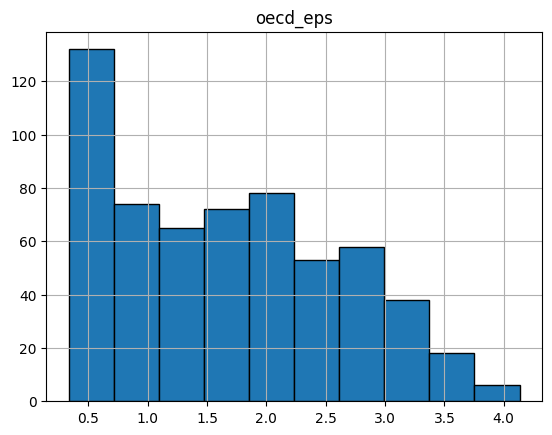

In [ ]:
# Histogramme et coefficient d'asymétrie (skewness).
df.hist(column='oecd_eps', edgecolor='black')
print("Skewness oecd_eps: ")
print(skew(df['oecd_eps'], nan_policy='omit'))

Question: Si vous n'avez pas accès à la fonction skew(), comment savoir si la distribution est asymétrique à droite (ou gauche)?

In [ ]:
# Distribution spatiale.
df_map = df.groupby(['ccodealp'])['oecd_eps'].mean() # Sélectionner la colonne 'oecd_eps' avant de calculer la moyenne.
df_map = df_map.reset_index()
fig = px.choropleth(df_map, locations='ccodealp',
                    locationmode='ISO-3',
                    color='oecd_eps',
                    hover_name='ccodealp',
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

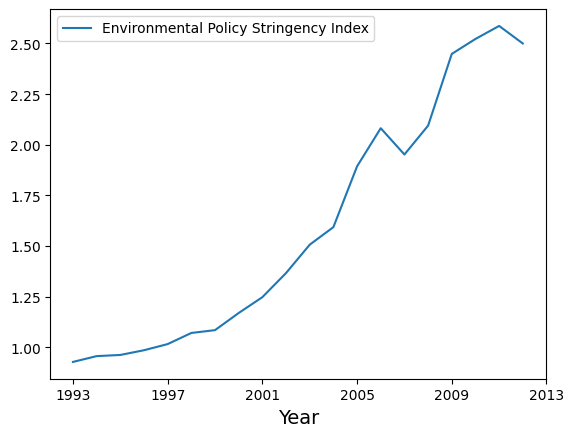

In [ ]:
# Distribution dans le temps.
df_line = df.groupby(['year'])['oecd_eps'].mean()
df_line = df_line.reset_index()
# df_line = df_line.rename(columns = {'index':'ccodealp'})
plt.plot(df_line['year'], df_line['oecd_eps'], label = "Environmental Policy Stringency Index")
plt.xlabel('Year', fontsize=14)

# Les labels de l'axe x étaient des entiers tous les cinq ans.
plt.xticks(np.arange(min(df_line['year']), max(df_line['year'])+2, 4.0))

plt.legend()
plt.show()

In [ ]:
# Graphique spaghetti avec la colonne 'oecd_eps' par pays au fil du temps.
df_line = df.groupby(['year', 'ccodealp'])['oecd_eps'].mean()
df_line = df_line.reset_index()
df_line = df_line.rename(columns = {'index':'ccodealp'})
fig = px.line(df_line, x="year", y="oecd_eps", color='ccodealp')
fig.show()